In [10]:
import numpy as np
import pandas as pd
import plotly_express as px

In [11]:
fname = "/home/jedediah/Mount/USB/Logs/InternalConditions.log"
my_cols = ['Date', 'Temp', 'Hum']
df = pd.read_csv(fname, sep=",|]", names=my_cols, engine='python')

In [12]:
df.Date = pd.to_datetime(df.Date.str.strip('['))
df.Temp = df.Temp.str.strip('Temp: ').str.strip('F')#.astype(float)
df.Hum = df.Hum.str.strip('Hum: ').str.strip('%')#.astype(float)

In [13]:
df.loc[(df.Temp == 'NA'), 'Temp'] = np.nan
df.loc[(df.Hum == 'NA'), 'Hum'] = np.nan
df.Temp = df.Temp.astype(float)
df.Hum = df.Hum.astype(float)
df.loc[(df.Temp > 150) | (df.Temp < 30), 'Temp'] = np.nan
df.loc[df.Hum > 100, 'Hum'] = np.nan

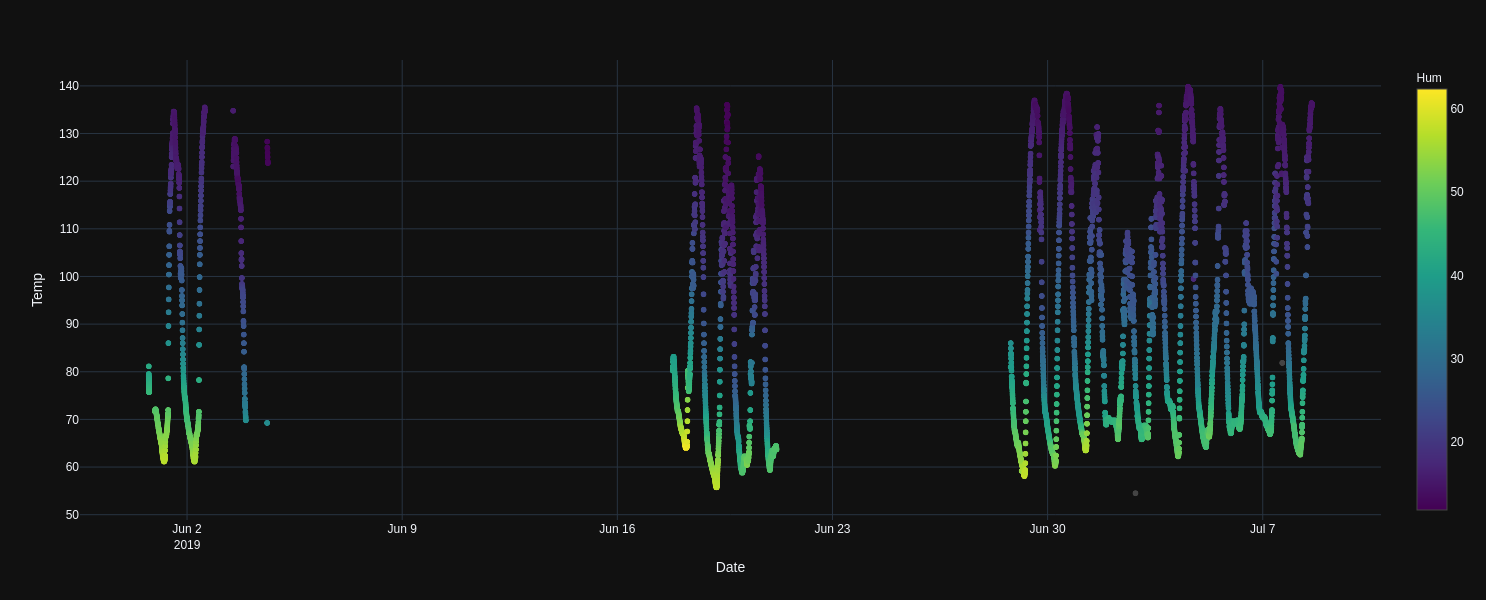

In [15]:
px.scatter(df, x='Date', y='Temp', color='Hum', template='plotly_dark', color_continuous_scale=px.colors.sequential.Viridis)